In [142]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib
import os
import sys
import numpy as np
import cmocean.cm as ocm
from scipy.interpolate import griddata
from dask.distributed import Client

proj_dir = os.path.join(os.pardir,os.pardir)
data_dir = os.path.join(proj_dir,'data','analysis')
fig_dir  = os.path.join(proj_dir,'reports','devel','figures')
int_dir = os.path.join(data_dir,'interim')

src_dir = os.path.join(proj_dir,'src')
sys.path.append(src_dir)

from visualization.shiftedColorMap import shiftedColorMap
from roms_tools.cartesian_grid_2d import cartesian_grid_2d

tools_dir = os.path.join(proj_dir,'src','tools')
sys.path.append(tools_dir)
from rotate_vector_roms import rotate_vector_roms

In [150]:
woa_path = os.path.join(data_dir,'external','woa','woa18_A5B7_t15_01.nc')
woa_t = xr.open_dataset(woa_path,decode_times=False)
woa_path = os.path.join(data_dir,'external','woa','woa18_A5B7_s15_01.nc')
woa_s = xr.open_dataset(woa_path,decode_times=False)

In [151]:
woa_t

<xarray.Dataset>
Dimensions:  (depth: 102, lat: 180, lon: 360, time: 1)
Coordinates:
  * time     (time) float32 79.5
  * depth    (depth) float32 0.0 5.0 10.0 15.0 ... 5200.0 5300.0 5400.0 5500.0
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float32 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
Data variables:
    s_an     (time, depth, lat, lon) float32 ...
Attributes:
    Conventions:                     CF-1.6, ACDD-1.3
    title:                           World Ocean Atlas 2018 : sea_water_salin...
    summary:                         Climatological mean salinity for the glo...
    references:                      Zweng, M. M, J. R. Reagan, D. Seidov, T....
    institution:                     National Centers for Environmental Infor...
    comment:                         global climatology as part of the World ...
    id:                              woa18_A5B7_s15_01.nc
    naming_authority:                gov.noaa.ncei
    sea_name:                        World-Wide Distribution
    time_coverage_start:             2005-07-01
    time_coverage_end:               2017-07-31
    time_coverage_duration:          P13Y
    time_coverage_resolution:        P03M
    geospatial_lat_min:              -89.5
    geospatial_lat_max:              89.5
    geospatial_lon_min:              -179.5
    geospatial_lon_max:              179.5
    geospatial_vertical_min:         0.0
    geospatial_vertical_max:         5500.0
    geospatial_lat_units:            degrees_north
    geospatial_lat_resolution:       1.00 degrees
    geospatial_lon_units:            degrees_east
    geospatial_lon_resolution:       1.00 degrees
    geospatial_vertical_units:       m
    geospatial_vertical_resolution:  SPECIAL
    geospatial_vertical_positive:    down
    creator_name:                    Ocean Climate Laboratory
    creator_email:                   NCEI.info@noaa.gov
    creator_url:                     http://www.ncei.noaa.gov
    creator_type:                    group
    creator_institution:             National Centers for Environmental Infor...
    project:                         World Ocean Atlas Project
    processing_level:                processed
    keywords:                        Oceans< Ocean Salinity >
    keywords_vocabulary:             ISO 19115
    standard_name_vocabulary:        CF Standard Name Table v49
    contributor_name:                Ocean Climate Laboratory
    contributor_role:                Calculation of climatologies
    cdm_data_type:                   Grid
    publisher_name:                  National Centers for Environmental Infor...
    publisher_institution:           National Centers for Environmental Infor...
    publisher_type:                  institution
    publisher_url:                   http://www.ncei.noaa.gov/
    publisher_email:                 NCEI.info@noaa.gov
    nodc_template_version:           NODC_NetCDF_Grid_Template_v2.0
    license:                         These data are openly available to the p...
    metadata_link:                   https://www.nodc.noaa.gov/OC5/woa18/
    date_created:                    2019-07-29 
    date_modified:                   2019-07-29 
    History:                         Translated to CF-1.0 Conventions by Netc...

# WOD individual casks

In [57]:
woa_path = os.path.join(data_dir,'external','woa','ocldb1600249232.11409_CTD.nc')
woa = xr.open_dataset(woa_path,decode_times=False)

In [65]:
woa.z_row_size[0:10].sum()

<xarray.DataArray 'z_row_size' ()>
array(13792.)

In [86]:
woa

array([-65.8108, -65.8108, -65.8108, -65.8108, -65.8108, -65.8108,
       -65.8108, -65.8108, -65.8108, -65.8108, -65.8108, -65.8108,
       -65.8108, -65.8108, -65.8108, -65.8108, -65.8108, -65.8108,
       -65.8108, -65.8108, -65.8108, -65.8108, -65.8108, -65.8108,
       -65.8108, -65.8108, -65.8108, -65.8108, -65.8108, -65.8108,
       -65.8108, -65.8108, -65.8108, -65.8108, -65.8108, -65.8108,
       -65.8108, -65.8108, -65.8108, -65.8108, -65.8108, -65.8108,
       -65.8108, -65.8108, -65.8108, -65.8108, -65.8108, -65.8108,
       -65.8108, -65.8108, -65.8108, -65.8108, -65.8108, -65.8108,
       -65.8108, -65.8108, -65.8108, -65.8108, -65.8108, -65.8108,
       -65.8108, -65.8108, -65.8108, -65.8108, -65.8108, -65.8108,
       -65.8108, -65.8108, -65.8108, -65.8108, -65.8108, -65.8108,
       -65.8108, -65.8108, -65.8108, -65.8108, -65.8108, -65.8108,
       -65.8108, -65.8108, -65.8108, -65.8108, -65.8108, -65.8108,
       -65.8108, -65.8108, -65.8108, -65.8108, -65.8108, -65.8

In [119]:
woa_lats=np.repeat(woa.lat[0].values,woa.z_row_size[0])
woa_lons
for i in np.arange(1,10):
    new_lats = np.repeat(woa.lat[i].values,woa.z_row_size[i])
    woa_lats = np.concatenate((woa_lats,new_lats))   

In [97]:
np.repeat(woa.lat[i].values,woa.z_row_size[i]).astype(list)

array([-63.52510070800781, -63.52510070800781, -63.52510070800781, ...,
       -63.52510070800781, -63.52510070800781, -63.52510070800781],
      dtype=object)

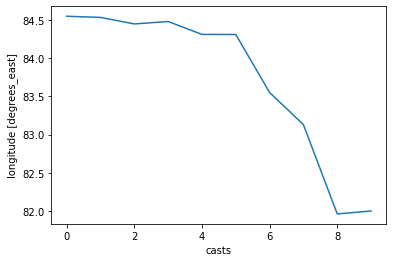

In [139]:
woa.lon[0:10].plot()

In [120]:
depth_2d,lat_2d = np.mgrid[-3644:10:10,-65.9:-63.5:0.1]

In [141]:
woa.date

<xarray.DataArray 'date' (casts: 88)>
array([20070215, 20070215, 20070215, 20070216, 20070216, 20070216, 20070216,
       20070217, 20070217, 20070217, 20070218, 20070218, 20070218, 20070218,
       20070219, 20070219, 20070219, 20070220, 20070220, 20070220, 20070220,
       20070220, 20070221, 20070221, 20070221, 20070221, 20070222, 20070222,
       20070222, 20070223, 20070224, 20070224, 20070225, 20070225, 20070226,
       20070226, 20070226, 20070226, 20070227, 20070227, 20070227, 20070228,
       20070228, 20070228, 20070301, 20070301, 20070301, 20070301, 20070302,
       20070302, 20070302, 20070303, 20070303, 20070303, 20070303, 20070304,
       20070304, 20070304, 20070305, 20070305, 20070305, 20070305, 20070306,
       20070306, 20070306, 20070307, 20070307, 20070307, 20070308, 20070308,
       20070308, 20070308, 20070309, 20070309, 20070309, 20070310, 20070310,
       20070310, 20070310, 20070311, 20070311, 20070311, 20070312, 20070312,
       20070312, 20070312, 20070312, 20070313], dtype=int32)
Coordinates:
    lat      (casts) float32 -65.8108 -65.7682 -65.7134 ... -28.9107 -28.3179
    lon      (casts) float32 84.5501 84.5348 84.4494 ... 95.007 95.0025 95.0084
    time     (casts) float64 8.661e+04 8.661e+04 ... 8.663e+04 8.663e+04
Dimensions without coordinates: casts
Attributes:
    long_name:  date
    comment:    YYYYMMDD

In [126]:
plt.pcolormesh?

In [129]:
from scipy.interpolate import griddata
g1 = griddata((-woa.z[0:13792].values,woa_lats),woa.Temperature[0:13792],(depth_2d,lat_2d),method='linear')

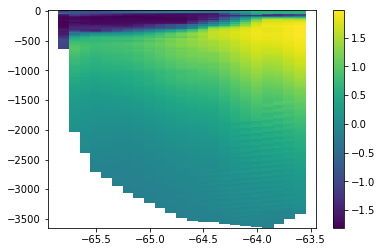

In [132]:
plt.pcolormesh(lat_2d,depth_2d,g1,shading='auto')

plt.colorbar()